In [40]:
import os
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import scikit_posthocs as sp

#hide warnings
import warnings
warnings.filterwarnings("ignore")

## Statistical Testing

### Load Dataset

In [45]:
print("Current Working Directory:", os.getcwd())

Current Working Directory: d:\Projects\repos\tu060\tests


In [46]:
path = './../datasets/'

In [47]:
files = ['2023_6_10_16_17_17_atari_space_invaders.csv', '2023_6_11_00_40_56_atari_breakout.csv', '2023_6_11_01_43_35_atari_air_raid.csv', '2023_6_11_09_09_42_atari_asterix.csv', '2023_6_11_10_19_31_atari_bowling.csv', '2023_6_11_11_54_40_atari_aasteroids.csv', '2023_6_11_16_16_46_atari_demon_attack.csv', '2023_6_11_18_38_56_atari_freeway.csv', '2023_6_11_19_46_04_atari_gravitar.csv', '2023_6_11_21_07_40_atari_james_bond.csv', '2023_6_11_22_11_09_atari_pong.csv', '2023_6_11_23_14_08_ms_pac_man.csv', '2023_6_12_00_19_04_montezumas_revenge.csv', '2023_6_12_01_21_01_private_eye.csv', '2023_6_12_02_21_54_qbert.csv', '2023_6_12_03_20_59_sea_quest.csv', '2023_6_12_09_47_36_venture.csv', '2023_6_12_10_51_48wizard_of_wor.csv', '2023_6_12_13_19_31_yars_revenge.csv', '2023_6_12_15_05_14_zaxxon.csv', '2023_6_14_23_06_09_cart_pole.csv', '2023_6_14_23_20_07_addiction.csv', '2023_6_15_02_46_50_lunar_lander.csv']

In [59]:
def statisticalTesting(file):
    date = file.split('_')[0:6]  # Extract the date portion
    date_string = '_'.join(date)  # Reconstruct the date string
    title = file.replace(date_string + '_', '').replace('.csv', '')  # Remove the date portion from the original string # Remove the date and ".csv" extension
    title = title.replace('_', ' ').capitalize()
    print(title + " Sim")

    #import data
    df_rewards = pd.read_csv(file)
    print("Index: " + str(df_rewards.index))

    #print boxplot to plot mean reward
    ax = sns.boxplot(x='capacity', y='reward', data=df_rewards, color='#77B150', width=0.5).set(title=title.capitalize()) #+ ' Simulator: Box Plot of Rewards by Capacity Size'
    plt.show()

    print("\nShapiro-Wilk test")
    # The Shapiro-Wilk test, tests the null hypothesis that the data was drawn from a normal distribution this is an ANOVA assumption
    shapiro_test = stats.shapiro(df_rewards.reward.values) #(p 5%)
    print(shapiro_test)
    print(shapiro_test.statistic)
    print(shapiro_test.pvalue) #reject if less than 0.05

    if(shapiro_test.pvalue <1.0):
        print("\nKruskal-Wallis test")
        # Group the data by capacity
        grouped_data = df_rewards.groupby('capacity')['reward']

        # Create a list to store the data for each group
        groups = []

        # Iterate over the groups and extract the corresponding data
        for group, data in grouped_data:
            groups.append(data)

        # Perform Kruskal-Wallis test
        statistic, p_value = stats.kruskal(*groups)

        # Print the test statistic and p-value
        print("Kruskal-Wallis Test Statistic:", statistic)
        print("p-value:", p_value)

            # Perform Dunn's test
        print("\nDunn's Post Hoc Test")

        result = sp.posthoc_dunn(df_rewards, val_col='reward', group_col='capacity')

        # Print the pairwise comparison results
        """
        table shows pair wise results for different capacity groups:
        * 1.0 indicates no significant difference and no evidence to reject the null hypothesis
        * 0.0 indicate significant difference and to reject the null hypothesis.
        * For values between 0 and 1, smaller values indicate stronger evidence against the null hypothesis and a higher likelihood of a true difference between the groups.
        """
        print(result)


Atari space invaders Sim
Index: RangeIndex(start=0, stop=1577, step=1)


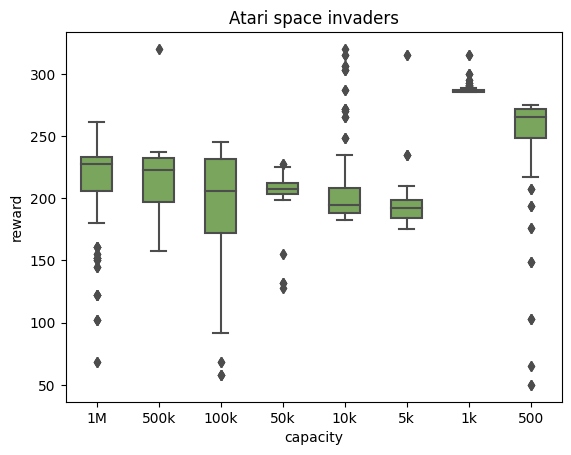


Shapiro-Wilk test
ShapiroResult(statistic=0.9578144550323486, pvalue=5.843757993461513e-21)
0.9578144550323486
5.843757993461513e-21

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 777.5710746758645
p-value: 1.2825666662849077e-163

Dunn's Post Hoc Test
              100k           10k            1M             1k           500   
100k  1.000000e+00  6.375553e-01  1.555465e-05   1.249021e-83  4.535668e-33  \
10k   6.375553e-01  1.000000e+00  1.200960e-04   1.638092e-79  1.433059e-30   
1M    1.555465e-05  1.200960e-04  1.000000e+00   8.316611e-51  2.788754e-14   
1k    1.249021e-83  1.638092e-79  8.316611e-51   1.000000e+00  9.316997e-14   
500   4.535668e-33  1.433059e-30  2.788754e-14   9.316997e-14  1.000000e+00   
500k  6.410504e-05  4.289628e-04  7.388831e-01   2.863855e-53  1.687681e-15   
50k   6.486755e-02  1.698420e-01  1.308036e-02   7.916883e-69  4.013648e-24   
5k    1.266858e-04  1.719611e-05  4.172545e-16  8.346732e-119  3.005112e-56   

              500k           

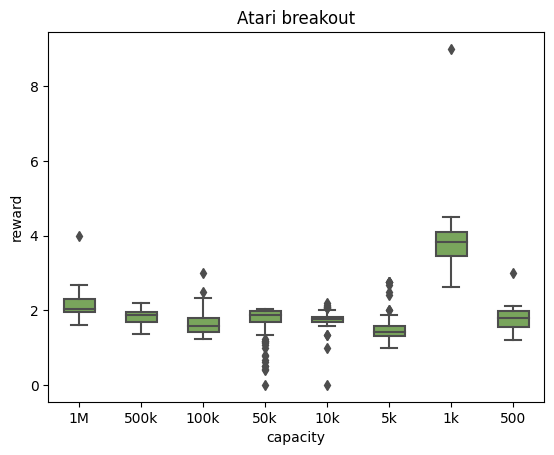


Shapiro-Wilk test
ShapiroResult(statistic=0.7534608244895935, pvalue=1.233142648605839e-43)
0.7534608244895935
1.233142648605839e-43

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 947.7439176321627
p-value: 2.3436452565066742e-200

Dunn's Post Hoc Test
               100k           10k            1M             1k           500   
100k   1.000000e+00  4.037348e-05  3.795004e-52  9.800148e-109  6.415099e-08  \
10k    4.037348e-05  1.000000e+00  1.133331e-28   4.995064e-73  1.907829e-01   
1M     3.795004e-52  1.133331e-28  1.000000e+00   3.465065e-12  1.260970e-22   
1k    9.800148e-109  4.995064e-73  3.465065e-12   1.000000e+00  6.057704e-63   
500    6.415099e-08  1.907829e-01  1.260970e-22   6.057704e-63  1.000000e+00   
500k   1.941359e-12  3.259786e-03  3.441878e-16   1.305822e-51  1.027205e-01   
50k    1.746057e-10  2.262620e-02  1.025992e-18   3.191334e-56  3.327633e-01   
5k     1.554497e-04  2.847068e-15  1.819555e-80  1.305159e-148  3.722270e-20   

              500k  

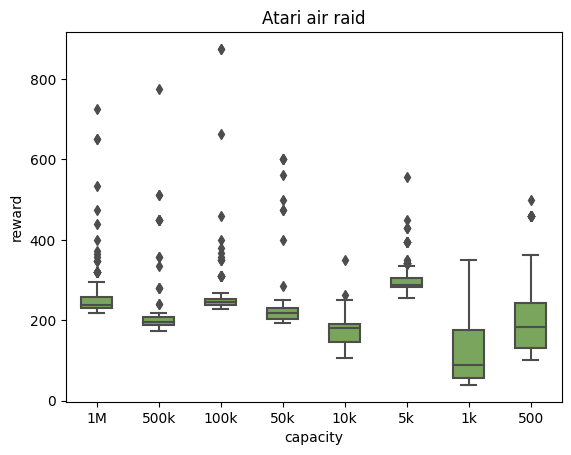


Shapiro-Wilk test
ShapiroResult(statistic=0.9034733772277832, pvalue=1.6225393663383106e-30)
0.9034733772277832
1.6225393663383106e-30

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 932.8008717468655
p-value: 3.958354147045707e-197

Dunn's Post Hoc Test
              100k            10k            1M             1k           500   
100k  1.000000e+00   7.791940e-58  2.627956e-01   2.873547e-73  1.725209e-23  \
10k   7.791940e-58   1.000000e+00  2.150295e-50   3.750789e-02  1.558606e-09   
1M    2.627956e-01   2.150295e-50  1.000000e+00   7.403208e-65  6.737392e-19   
1k    2.873547e-73   3.750789e-02  7.403208e-65   1.000000e+00  4.827842e-16   
500   1.725209e-23   1.558606e-09  6.737392e-19   4.827842e-16  1.000000e+00   
500k  3.085402e-28   5.614977e-07  3.691065e-23   1.425189e-12  3.016641e-01   
50k   4.523128e-11   3.432265e-21  4.425628e-08   9.732203e-31  6.587827e-04   
5k    1.156096e-07  1.837374e-101  1.278704e-10  9.219856e-122  5.621105e-53   

              500k 

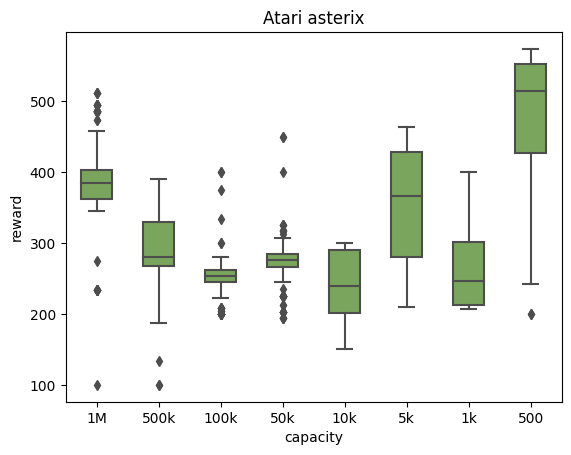


Shapiro-Wilk test
ShapiroResult(statistic=0.9117107391357422, pvalue=1.8397594752403207e-29)
0.9117107391357422
1.8397594752403207e-29

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 886.0963800838313
p-value: 4.826352437906447e-187

Dunn's Post Hoc Test
              100k           10k            1M            1k           500   
100k  1.000000e+00  5.458689e-01  3.039086e-63  1.727321e-01  3.957922e-92  \
10k   5.458689e-01  1.000000e+00  9.662867e-68  4.913257e-02  1.441837e-97   
1M    3.039086e-63  9.662867e-68  1.000000e+00  1.137590e-53  3.855003e-04   
1k    1.727321e-01  4.913257e-02  1.137590e-53  1.000000e+00  1.962239e-80   
500   3.957922e-92  1.441837e-97  3.855003e-04  1.962239e-80  1.000000e+00   
500k  1.867848e-13  1.694292e-15  4.138076e-21  2.041729e-09  1.381979e-38   
50k   2.414644e-06  1.042419e-07  1.488879e-33  8.030827e-04  4.093428e-55   
5k    1.061759e-35  4.520232e-39  1.595898e-05  1.140761e-28  3.539668e-15   

              500k           50k     

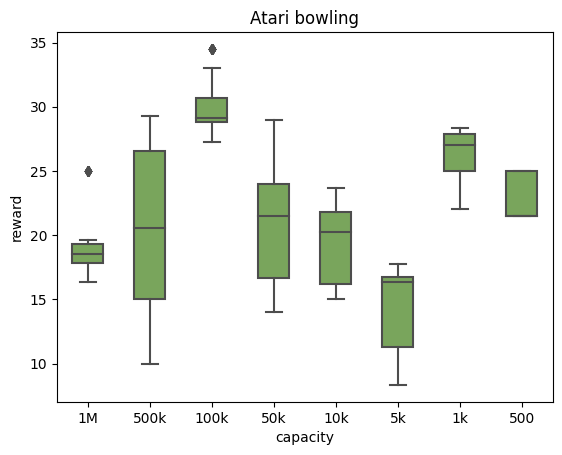


Shapiro-Wilk test
ShapiroResult(statistic=0.9780729413032532, pvalue=1.174988519024936e-13)
0.9780729413032532
1.174988519024936e-13

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 864.3036435174553
p-value: 2.4483695187558907e-182

Dunn's Post Hoc Test
               100k           10k            1M            1k           500   
100k   1.000000e+00  1.088374e-67  4.490532e-73  2.006480e-08  2.014678e-15  \
10k    1.088374e-67  1.000000e+00  4.822849e-01  1.730136e-32  5.631591e-06   
1M     4.490532e-73  4.822849e-01  1.000000e+00  3.052299e-36  4.620118e-07   
1k     2.006480e-08  1.730136e-32  3.052299e-36  1.000000e+00  8.346041e-05   
500    2.014678e-15  5.631591e-06  4.620118e-07  8.346041e-05  1.000000e+00   
500k   7.460181e-53  4.000819e-02  5.879348e-03  1.329871e-22  2.173841e-03   
50k    5.340185e-52  3.260286e-02  4.570746e-03  4.122393e-22  2.721184e-03   
5k    8.972903e-143  3.155952e-16  8.239230e-14  5.078568e-89  3.302768e-25   

              500k           

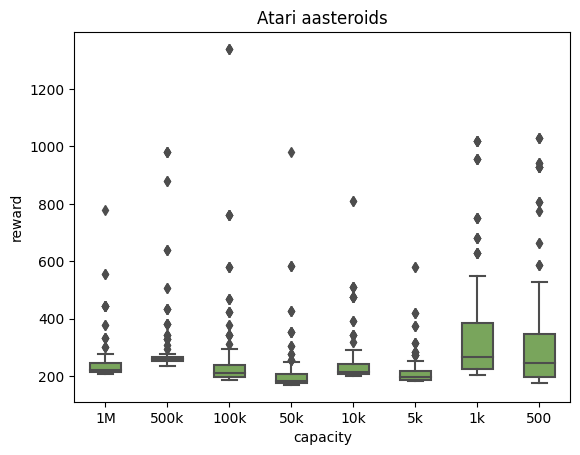


Shapiro-Wilk test
ShapiroResult(statistic=0.5646759271621704, pvalue=0.0)
0.5646759271621704
0.0

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 502.5673145684723
p-value: 2.2493324404923887e-104

Dunn's Post Hoc Test
              100k           10k            1M            1k           500   
100k  1.000000e+00  1.282567e-01  2.987394e-03  6.175247e-19  1.745639e-05  \
10k   1.282567e-01  1.000000e+00  1.450164e-01  1.304561e-13  5.235286e-03   
1M    2.987394e-03  1.450164e-01  1.000000e+00  2.868327e-09  1.818758e-01   
1k    6.175247e-19  1.304561e-13  2.868327e-09  1.000000e+00  4.333809e-06   
500   1.745639e-05  5.235286e-03  1.818758e-01  4.333809e-06  1.000000e+00   
500k  3.304977e-24  4.055233e-18  5.488255e-13  1.969305e-01  4.353698e-09   
50k   9.825725e-14  2.256544e-19  1.683664e-25  3.800022e-60  6.911524e-32   
5k    3.931582e-05  1.554583e-08  1.246463e-12  7.961805e-39  3.678117e-17   

              500k           50k            5k  
100k  3.304977e-24  9.825

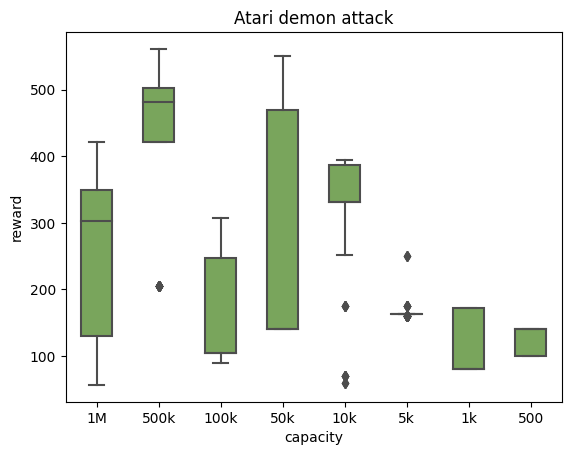


Shapiro-Wilk test
ShapiroResult(statistic=0.8532755374908447, pvalue=1.2204849908689756e-35)
0.8532755374908447
1.2204849908689756e-35

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 766.447341161516
p-value: 3.2208028054007444e-161

Dunn's Post Hoc Test
              100k           10k            1M             1k           500   
100k  1.000000e+00  9.317362e-37  5.663972e-08   1.088130e-06  3.695708e-04  \
10k   9.317362e-37  1.000000e+00  4.565599e-13   3.277647e-69  3.760789e-59   
1M    5.663972e-08  4.565599e-13  1.000000e+00   5.487923e-25  2.527515e-19   
1k    1.088130e-06  3.277647e-69  5.487923e-25   1.000000e+00  1.939832e-01   
500   3.695708e-04  3.760789e-59  2.527515e-19   1.939832e-01  1.000000e+00   
500k  5.983694e-62  5.155532e-06  2.482667e-30  1.115487e-100  6.711655e-89   
50k   7.460648e-10  1.044209e-10  4.541286e-01   2.621803e-28  3.013853e-22   
5k    6.447916e-06  4.449074e-16  3.652890e-01   5.929467e-21  7.517686e-16   

               500k         

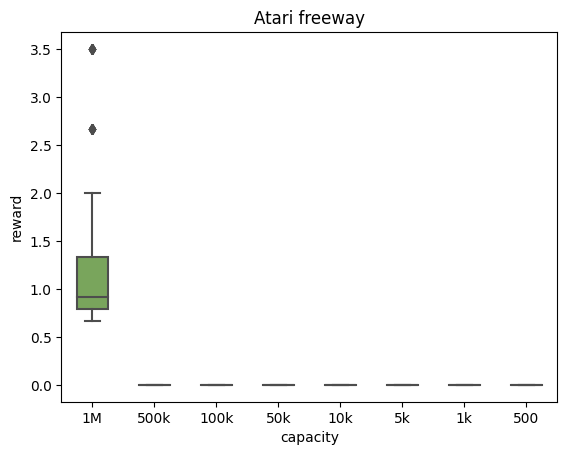


Shapiro-Wilk test
ShapiroResult(statistic=0.36500805616378784, pvalue=0.0)
0.36500805616378784
0.0

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 1510.0451051242528
p-value: 0.0

Dunn's Post Hoc Test
               100k            10k             1M             1k   
100k   1.000000e+00   1.000000e+00  1.150317e-189   1.000000e+00  \
10k    1.000000e+00   1.000000e+00  1.150317e-189   1.000000e+00   
1M    1.150317e-189  1.150317e-189   1.000000e+00  1.150317e-189   
1k     1.000000e+00   1.000000e+00  1.150317e-189   1.000000e+00   
500    1.000000e+00   1.000000e+00  1.150317e-189   1.000000e+00   
500k   1.000000e+00   1.000000e+00  1.150317e-189   1.000000e+00   
50k    1.000000e+00   1.000000e+00  1.150317e-189   1.000000e+00   
5k     1.000000e+00   1.000000e+00  1.150317e-189   1.000000e+00   

                500           500k            50k             5k  
100k   1.000000e+00   1.000000e+00   1.000000e+00   1.000000e+00  
10k    1.000000e+00   1.000000e+00   1.000000e+

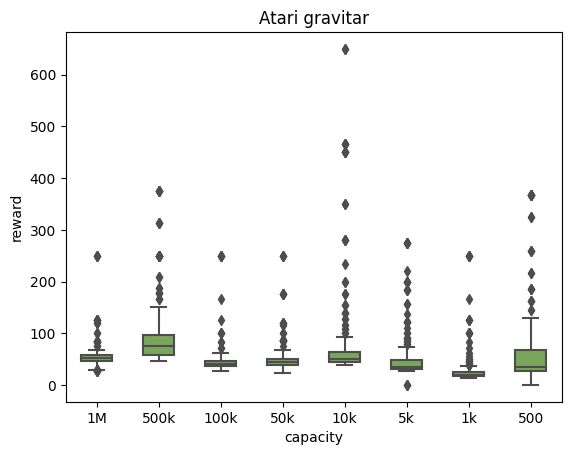


Shapiro-Wilk test
ShapiroResult(statistic=0.5638512372970581, pvalue=0.0)
0.5638512372970581
0.0

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 592.2228825667135
p-value: 1.1512416384186485e-123

Dunn's Post Hoc Test
              100k           10k            1M             1k           500   
100k  1.000000e+00  3.231371e-11  1.224629e-06   9.561897e-24  8.268860e-01  \
10k   3.231371e-11  1.000000e+00  7.405304e-02   1.247607e-62  6.740270e-12   
1M    1.224629e-06  7.405304e-02  1.000000e+00   2.568274e-50  3.839038e-07   
1k    9.561897e-24  1.247607e-62  2.568274e-50   1.000000e+00  7.579754e-23   
500   8.268860e-01  6.740270e-12  3.839038e-07   7.579754e-23  1.000000e+00   
500k  3.135683e-33  7.384094e-08  7.618430e-13  4.453875e-108  1.795128e-34   
50k   4.082258e-02  4.133707e-06  4.862586e-03   8.323848e-34  2.337837e-02   
5k    1.367838e-01  4.459299e-16  2.277197e-10   1.165600e-17  2.037037e-01   

               500k           50k            5k  
100k   3.135683

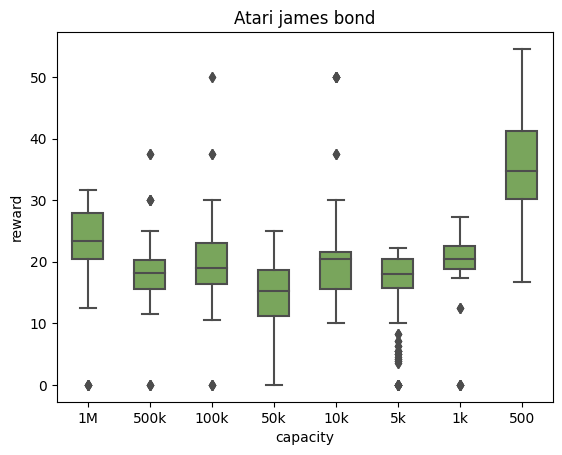


Shapiro-Wilk test
ShapiroResult(statistic=0.9225150346755981, pvalue=8.509140791396769e-28)
0.9225150346755981
8.509140791396769e-28

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 707.1068894113187
p-value: 2.0245311098186324e-148

Dunn's Post Hoc Test
              100k           10k            1M            1k            500   
100k  1.000000e+00  8.702140e-01  4.186154e-12  8.915274e-03   7.788417e-55  \
10k   8.702140e-01  1.000000e+00  1.311505e-11  1.421044e-02   9.927199e-54   
1M    4.186154e-12  1.311505e-11  1.000000e+00  1.592681e-05   4.517726e-18   
1k    8.915274e-03  1.421044e-02  1.592681e-05  1.000000e+00   1.580564e-38   
500   7.788417e-55  9.927199e-54  4.517726e-18  1.580564e-38   1.000000e+00   
500k  1.077000e-02  6.658441e-03  2.522824e-21  2.399761e-07   1.387064e-73   
50k   4.573407e-12  1.424885e-12  1.290422e-43  1.520531e-21  3.033161e-112   
5k    2.329146e-05  1.112144e-05  6.292171e-29  7.592492e-12   1.760924e-87   

              500k           

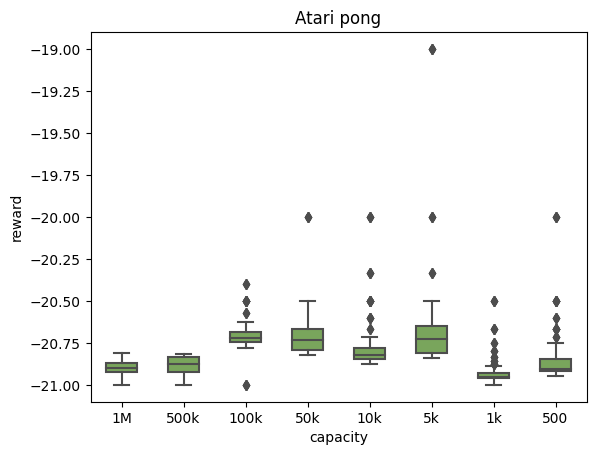


Shapiro-Wilk test
ShapiroResult(statistic=0.7237859964370728, pvalue=4.203895392974451e-45)
0.7237859964370728
4.203895392974451e-45

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 965.2963032925762
p-value: 3.787234050621803e-204

Dunn's Post Hoc Test
              100k           10k            1M            1k           500   
100k  1.000000e+00  1.360973e-11  7.256983e-70  9.801308e-90  2.235940e-43  \
10k   1.360973e-11  1.000000e+00  9.142993e-28  1.336951e-40  1.708018e-12   
1M    7.256983e-70  9.142993e-28  1.000000e+00  1.552372e-02  1.112733e-04   
1k    9.801308e-90  1.336951e-40  1.552372e-02  1.000000e+00  3.288668e-10   
500   2.235940e-43  1.708018e-12  1.112733e-04  3.288668e-10  1.000000e+00   
500k  4.217903e-53  8.876654e-18  1.962700e-02  2.000955e-06  1.257217e-01   
50k   6.462558e-01  2.770442e-10  1.523517e-66  5.548536e-86  9.355349e-41   
5k    2.932336e-01  1.132387e-08  5.277265e-62  9.001403e-81  2.848476e-37   

              500k           50k       

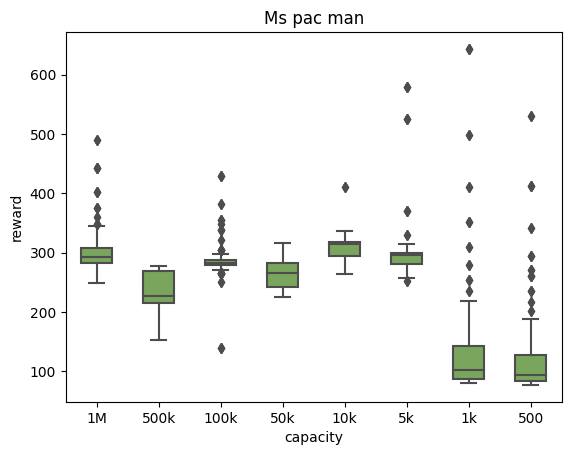


Shapiro-Wilk test
ShapiroResult(statistic=0.8682863712310791, pvalue=1.6096365570046136e-34)
0.8682863712310791
1.6096365570046136e-34

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 1054.046564174091
p-value: 2.5220642714393058e-223

Dunn's Post Hoc Test
              100k            10k            1M             1k            500   
100k  1.000000e+00   8.672539e-13  1.845757e-03   8.488442e-50   1.649913e-56  \
10k   8.672539e-13   1.000000e+00  5.648427e-05  3.857395e-107  7.226941e-117   
1M    1.845757e-03   5.648427e-05  1.000000e+00   6.652565e-72   6.458903e-80   
1k    8.488442e-50  3.857395e-107  6.652565e-72   1.000000e+00   3.067466e-01   
500   1.649913e-56  7.226941e-117  6.458903e-80   3.067466e-01   1.000000e+00   
500k  1.972359e-22   5.041449e-64  9.192646e-38   3.516037e-07   1.002120e-09   
50k   3.199787e-07   1.460178e-34  2.055516e-16   2.350442e-22   6.962366e-27   
5k    6.899826e-03   9.021597e-06  6.804653e-01   1.017096e-68   1.474164e-76   

         

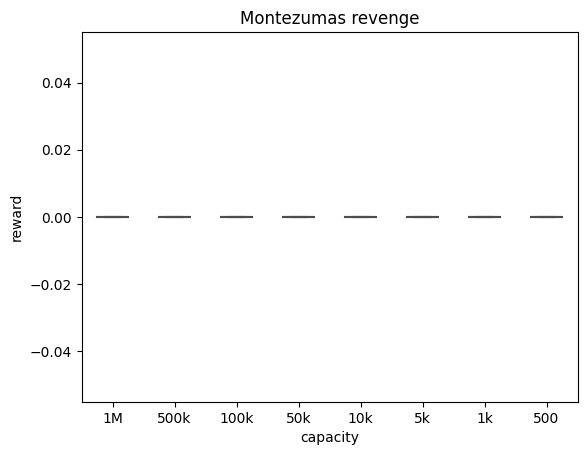


Shapiro-Wilk test
ShapiroResult(statistic=1.0, pvalue=1.0)
1.0
1.0
Private eye Sim
Index: RangeIndex(start=0, stop=1496, step=1)


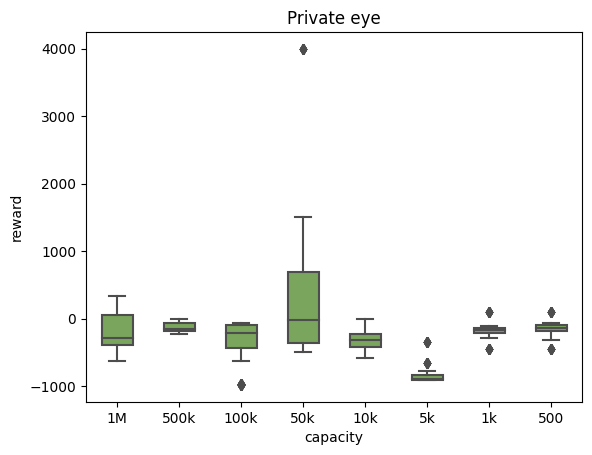


Shapiro-Wilk test
ShapiroResult(statistic=0.6321684122085571, pvalue=0.0)
0.6321684122085571
0.0

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 561.3830975953758
p-value: 5.0127708276699685e-117

Dunn's Post Hoc Test
              100k           10k            1M            1k           500   
100k  1.000000e+00  5.522065e-03  3.663791e-01  2.423058e-03  3.725242e-06  \
10k   5.522065e-03  1.000000e+00  2.349179e-04  6.334580e-09  1.351228e-13   
1M    3.663791e-01  2.349179e-04  1.000000e+00  3.321198e-02  1.969678e-04   
1k    2.423058e-03  6.334580e-09  3.321198e-02  1.000000e+00  1.110788e-01   
500   3.725242e-06  1.351228e-13  1.969678e-04  1.110788e-01  1.000000e+00   
500k  1.853268e-10  5.803985e-20  4.506565e-08  8.370470e-04  8.065789e-02   
50k   4.075144e-09  4.885982e-18  6.429866e-07  4.394987e-03  2.094921e-01   
5k    9.394449e-39  1.242448e-24  4.562671e-44  5.449127e-58  1.085786e-69   

              500k           50k            5k  
100k  1.853268e-10  4.075

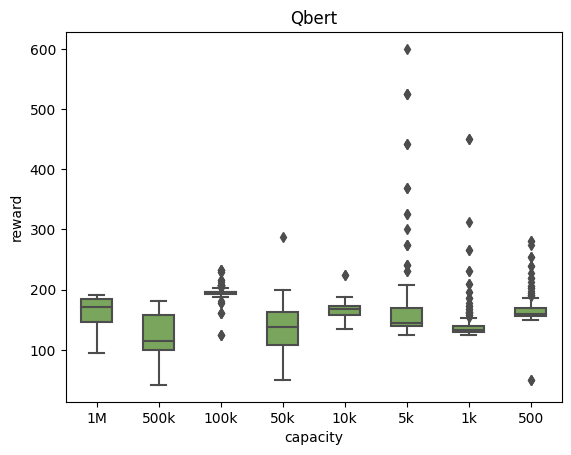


Shapiro-Wilk test
ShapiroResult(statistic=0.8128944635391235, pvalue=1.6476046953991902e-39)
0.8128944635391235
1.6476046953991902e-39

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 697.0265906220905
p-value: 3.017787755789856e-146

Dunn's Post Hoc Test
               100k           10k            1M            1k           500   
100k   1.000000e+00  4.723174e-26  3.620686e-26  1.102500e-92  3.776718e-28  \
10k    4.723174e-26  1.000000e+00  9.801103e-01  5.990898e-23  6.568812e-01   
1M     3.620686e-26  9.801103e-01  1.000000e+00  7.677664e-23  6.750023e-01   
1k     1.102500e-92  5.990898e-23  7.677664e-23  1.000000e+00  4.541016e-21   
500    3.776718e-28  6.568812e-01  6.750023e-01  4.541016e-21  1.000000e+00   
500k  5.382808e-104  1.271925e-28  1.680571e-28  2.167417e-01  1.660647e-26   
50k    5.083448e-79  1.406986e-16  1.733440e-16  1.097366e-01  5.285587e-15   
5k     2.233249e-44  6.016068e-04  6.592465e-04  1.360912e-10  2.815219e-03   

               500k         

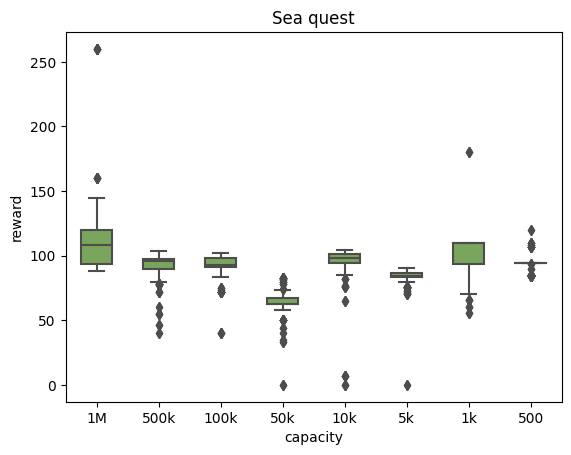


Shapiro-Wilk test
ShapiroResult(statistic=0.8149023056030273, pvalue=2.9031611129419046e-39)
0.8149023056030273
2.9031611129419046e-39

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 754.5933792648599
p-value: 1.1618243951561244e-158

Dunn's Post Hoc Test
              100k           10k             1M            1k           500   
100k  1.000000e+00  1.978833e-04   2.576706e-16  1.588047e-10  4.811910e-01  \
10k   1.978833e-04  1.000000e+00   6.975157e-06  7.194159e-03  2.557714e-03   
1M    2.576706e-16  6.975157e-06   1.000000e+00  7.043778e-02  6.889742e-14   
1k    1.588047e-10  7.194159e-03   7.043778e-02  1.000000e+00  1.247012e-08   
500   4.811910e-01  2.557714e-03   6.889742e-14  1.247012e-08  1.000000e+00   
500k  3.371161e-01  5.769240e-03   4.640190e-13  5.388071e-08  7.983441e-01   
50k   1.805868e-45  1.252993e-71  3.696015e-110  9.635112e-94  6.207603e-50   
5k    1.859321e-13  1.410652e-28   2.460636e-54  5.390817e-43  7.448806e-16   

              500k         

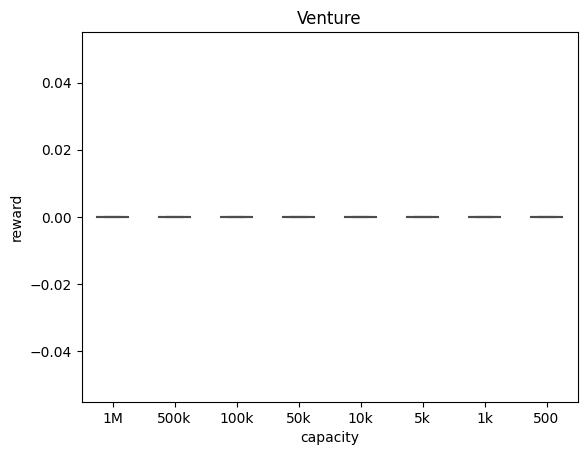


Shapiro-Wilk test
ShapiroResult(statistic=1.0, pvalue=1.0)
1.0
1.0
Of wor Sim
Index: RangeIndex(start=0, stop=1568, step=1)


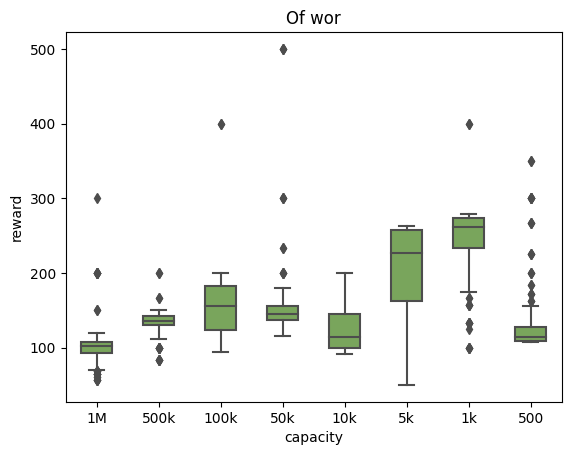


Shapiro-Wilk test
ShapiroResult(statistic=0.8824505805969238, pvalue=6.868608183106481e-33)
0.8824505805969238
6.868608183106481e-33

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 819.3876572780374
p-value: 1.2146608050145877e-172

Dunn's Post Hoc Test
              100k           10k             1M             1k           500   
100k  1.000000e+00  4.384486e-18   3.380381e-44   4.473012e-24  1.699599e-11  \
10k   4.384486e-18  1.000000e+00   1.517707e-07   5.885138e-79  5.091859e-02   
1M    3.380381e-44  1.517707e-07   1.000000e+00  1.065708e-128  5.323276e-13   
1k    4.473012e-24  5.885138e-79  1.065708e-128   1.000000e+00  5.792021e-64   
500   1.699599e-11  5.091859e-02   5.323276e-13   5.792021e-64  1.000000e+00   
500k  4.579276e-05  3.450042e-06   2.871175e-23   3.541590e-46  7.232464e-03   
50k   9.183159e-01  1.184605e-17   1.836824e-43   1.784083e-24  3.636395e-11   
5k    1.396329e-05  5.382260e-39   1.786043e-75   5.806325e-09  1.004432e-28   

              500k  

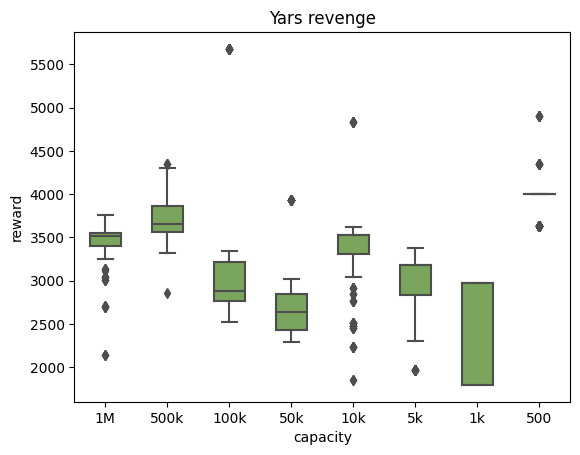


Shapiro-Wilk test
ShapiroResult(statistic=0.962868869304657, pvalue=3.097627767346168e-19)
0.962868869304657
3.097627767346168e-19

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 963.3013315588556
p-value: 1.0216054721910971e-203

Dunn's Post Hoc Test
              100k           10k            1M             1k            500   
100k  1.000000e+00  3.701808e-08  2.053808e-15   6.266139e-04   1.420415e-63  \
10k   3.701808e-08  1.000000e+00  9.062798e-03   7.917831e-22   4.174282e-34   
1M    2.053808e-15  9.062798e-03  1.000000e+00   2.246942e-34   9.524903e-22   
1k    6.266139e-04  7.917831e-22  2.246942e-34   1.000000e+00  2.727328e-105   
500   1.420415e-63  4.174282e-34  9.524903e-22  2.727328e-105   1.000000e+00   
500k  9.807498e-40  1.550224e-16  1.634142e-08   1.440023e-71   7.667111e-05   
50k   1.000134e-04  5.139788e-24  3.870362e-37   6.123440e-01  3.805922e-110   
5k    4.991131e-01  2.762514e-11  1.637267e-20   3.093003e-03   2.177415e-79   

              500k    

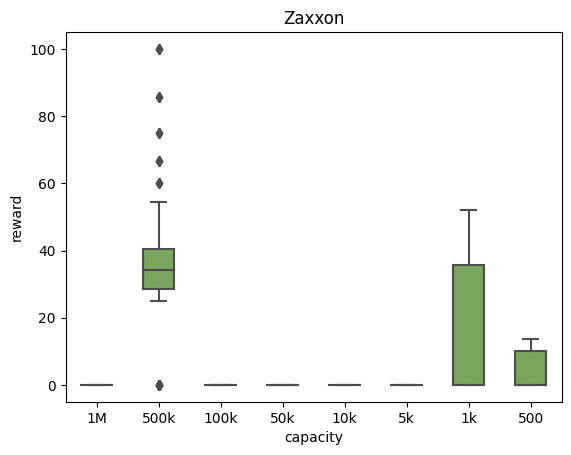


Shapiro-Wilk test
ShapiroResult(statistic=0.5171675682067871, pvalue=0.0)
0.5171675682067871
0.0

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 910.0019016123044
p-value: 3.3223079483999274e-192

Dunn's Post Hoc Test
               100k            10k             1M            1k           500   
100k   1.000000e+00   1.000000e+00   1.000000e+00  3.903493e-32  9.435755e-13  \
10k    1.000000e+00   1.000000e+00   1.000000e+00  3.903493e-32  9.435755e-13   
1M     1.000000e+00   1.000000e+00   1.000000e+00  3.903493e-32  9.435755e-13   
1k     3.903493e-32   3.903493e-32   3.903493e-32  1.000000e+00  3.139196e-06   
500    9.435755e-13   9.435755e-13   9.435755e-13  3.139196e-06  1.000000e+00   
500k  1.633003e-104  1.633003e-104  1.633003e-104  3.747653e-23  4.233394e-48   
50k    1.000000e+00   1.000000e+00   1.000000e+00  3.903493e-32  9.435755e-13   
5k     1.000000e+00   1.000000e+00   1.000000e+00  3.903493e-32  9.435755e-13   

               500k            50k             

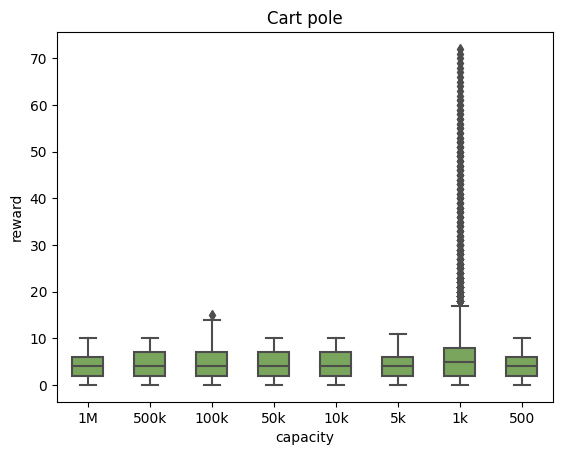


Shapiro-Wilk test
ShapiroResult(statistic=0.608319878578186, pvalue=0.0)
0.608319878578186
0.0

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 123.9261028252332
p-value: 1.1644834880900072e-23

Dunn's Post Hoc Test
              100k           10k            1M            1k           500   
100k  1.000000e+00  4.282460e-02  3.189268e-03  6.194687e-09  1.490402e-02  \
10k   4.282460e-02  1.000000e+00  3.551708e-01  4.861787e-15  4.281976e-01   
1M    3.189268e-03  3.551708e-01  1.000000e+00  2.180206e-18  9.693241e-01   
1k    6.194687e-09  4.861787e-15  2.180206e-18  1.000000e+00  1.424866e-12   
500   1.490402e-02  4.281976e-01  9.693241e-01  1.424866e-12  1.000000e+00   
500k  5.086090e-02  9.419177e-01  3.185376e-01  8.615110e-15  3.944494e-01   
50k   5.745805e-02  8.999534e-01  2.935769e-01  1.302615e-14  3.710146e-01   
5k    5.724592e-03  4.600669e-01  8.525770e-01  1.101309e-17  8.491813e-01   

              500k           50k            5k  
100k  5.086090e-02  5.745805

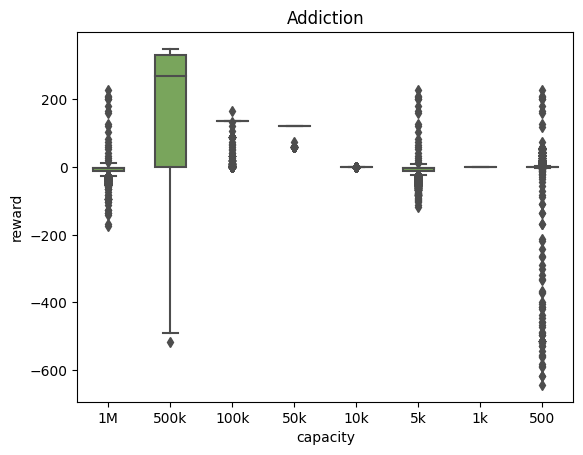


Shapiro-Wilk test
ShapiroResult(statistic=0.7308021187782288, pvalue=0.0)
0.7308021187782288
0.0

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 22311.574258481738
p-value: 0.0

Dunn's Post Hoc Test
              100k            10k             1M             1k   
100k  1.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00  \
10k   0.000000e+00   1.000000e+00  1.325119e-200  2.228183e-245   
1M    0.000000e+00  1.325119e-200   1.000000e+00   0.000000e+00   
1k    0.000000e+00  2.228183e-245   0.000000e+00   1.000000e+00   
500   0.000000e+00   2.765662e-94   0.000000e+00   8.096091e-38   
500k  1.517346e-61   0.000000e+00   0.000000e+00  8.469628e-126   
50k   3.492217e-54   0.000000e+00   0.000000e+00  5.635240e-137   
5k    0.000000e+00  4.193447e-180   1.089904e-01   0.000000e+00   

                500           500k            50k             5k  
100k   0.000000e+00   1.517346e-61   3.492217e-54   0.000000e+00  
10k    2.765662e-94   0.000000e+00   0.000000e+00  4.19344

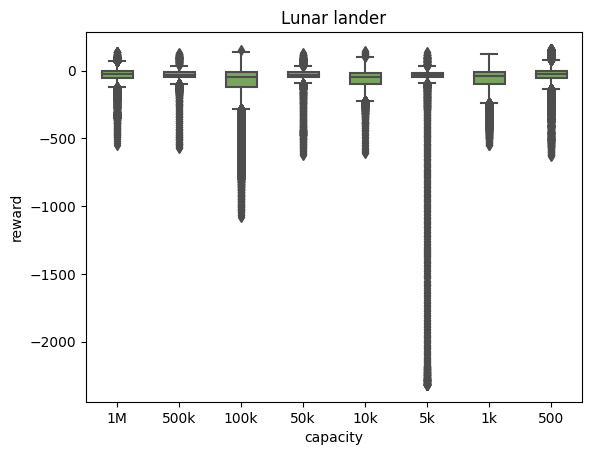


Shapiro-Wilk test
ShapiroResult(statistic=0.4664379358291626, pvalue=0.0)
0.4664379358291626
0.0

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 6789.996076300604
p-value: 0.0

Dunn's Post Hoc Test
               100k           10k            1M             1k            500   
100k   1.000000e+00  1.540618e-12  0.000000e+00   2.758880e-22   0.000000e+00  \
10k    1.540618e-12  1.000000e+00  0.000000e+00   2.800160e-51   0.000000e+00   
1M     0.000000e+00  0.000000e+00  1.000000e+00   0.000000e+00   8.470894e-11   
1k     2.758880e-22  2.800160e-51  0.000000e+00   1.000000e+00  1.251252e-267   
500    0.000000e+00  0.000000e+00  8.470894e-11  1.251252e-267   1.000000e+00   
500k  7.877991e-302  0.000000e+00  2.471292e-38  6.642964e-141   1.852748e-12   
50k   4.333070e-293  0.000000e+00  3.615798e-42  3.751828e-135   1.555694e-14   
5k    6.151745e-279  0.000000e+00  1.561614e-49  1.125349e-125   1.154355e-18   

               500k            50k             5k  
100k  7.877991e

In [60]:
for f in files:
    fl = path+f #file location
    statisticalTesting(fl)